<h1>Evaluacion Final<h1>
    Introduccion
    <h4>Para este<h4>
    

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import dabl
from math import * 

In [3]:
df = pd.read_csv('datasets/student-performance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


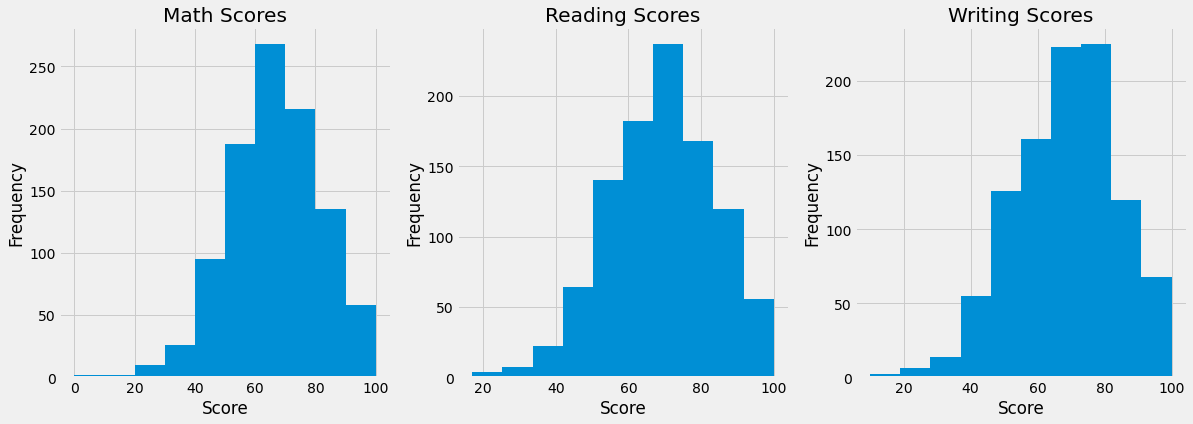

In [13]:
plt.subplot(1,3,1)
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
plt.hist(df['math score'])
plt.title('Math Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.subplot(1,3,2)
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
plt.hist(df['reading score'])
plt.title('Reading Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.subplot(1,3,3)
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
plt.hist(df['writing score'])
plt.title('Writing Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.show()

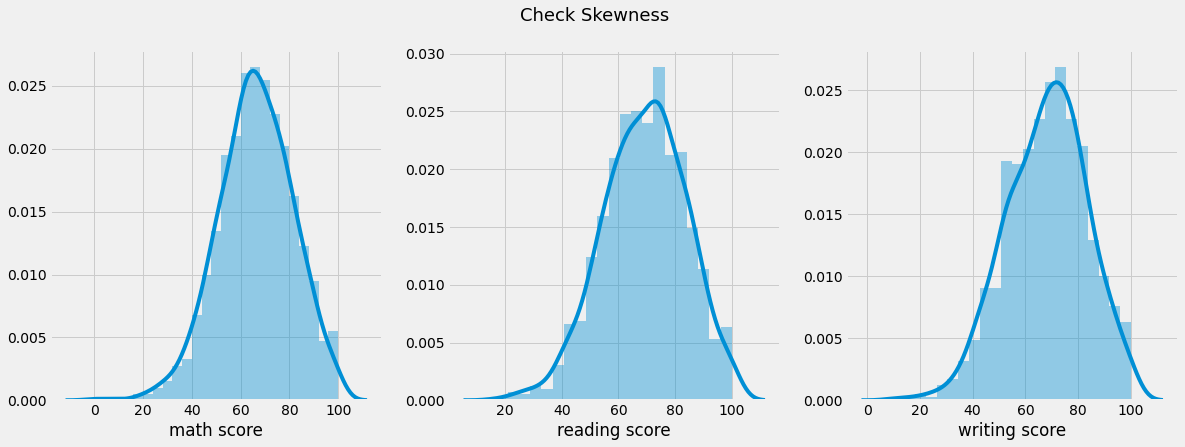

In [15]:
plt.subplot(1, 3, 1)
sns.distplot(df['math score'])

plt.subplot(1, 3, 2)
sns.distplot(df['reading score'])

plt.subplot(1, 3, 3)
sns.distplot(df['writing score'])

plt.suptitle('Check Skewness', fontsize = 18)
plt.show()

In [17]:
df.groupby(['gender']).agg(['min','median','max'])

math score             reading score             writing score         \
              min median  max           min median  max           min median   
gender                                                                         
female          0     65  100            17     73  100            10     74   
male           27     69  100            23     66  100            15     64   

             
        max  
gender       
female  100  
male    100

In [19]:
df[['lunch','gender','math score','writing score','reading score']].groupby(['lunch','gender']).agg('median')

math score  writing score  reading score
lunch        gender                                          
free/reduced female        57.0           68.0           67.0
             male          62.0           59.0           61.0
standard     female        67.0           76.0           75.0
             male          72.0           67.0           67.5

In [20]:
df[['test preparation course','gender','math score','writing score','reading score']].groupby(['test preparation course','gender']).agg('median')

math score  writing score  reading score
test preparation course gender                                          
completed               female          67             79             78
                        male            73             70             71
none                    female          62             70             71
                        male            67             60             63

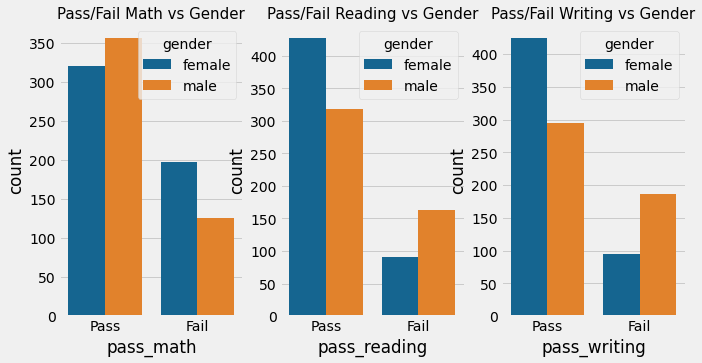

In [107]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.subplot(1,3,1)
sns.countplot(x = df['pass_math'], data = df, hue = df['gender'])
plt.title('Pass/Fail Math vs Gender', fontsize = 15, fontweight = 30)
plt.subplot(1,3,2)
sns.countplot(x = df['pass_reading'], data = df, hue = df['gender'])
plt.title('Pass/Fail Reading vs Gender', fontsize = 15, fontweight = 30)
plt.subplot(1,3,3)
sns.countplot(x = df['pass_writing'], data = df, hue = df['gender'])
plt.title('Pass/Fail Writing vs Gender', fontsize = 15, fontweight = 30)
plt.show()

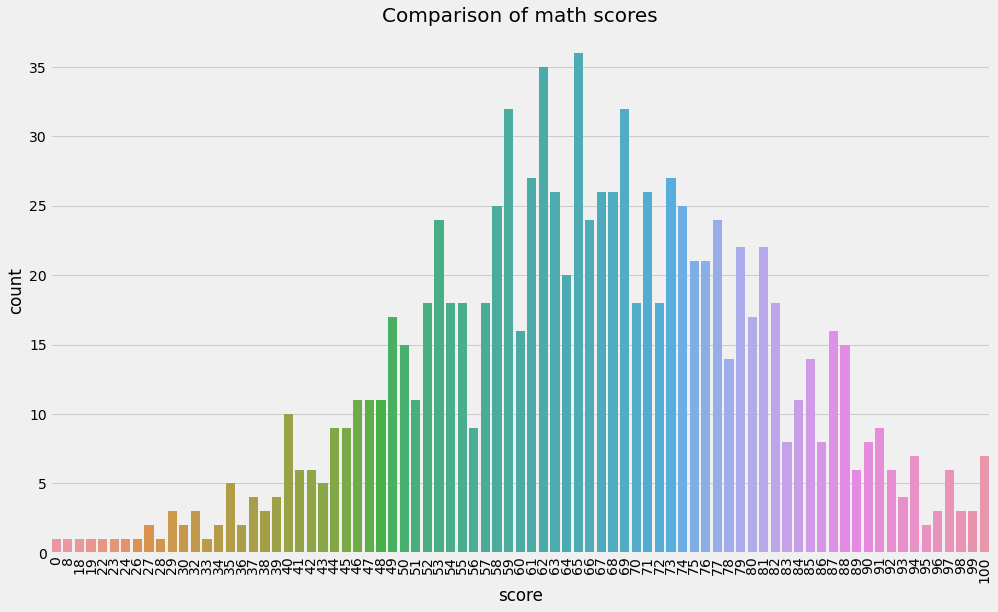

In [90]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

sns.countplot(df['math score'])
plt.title('Comparison of math scores', fontweight = 30, fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

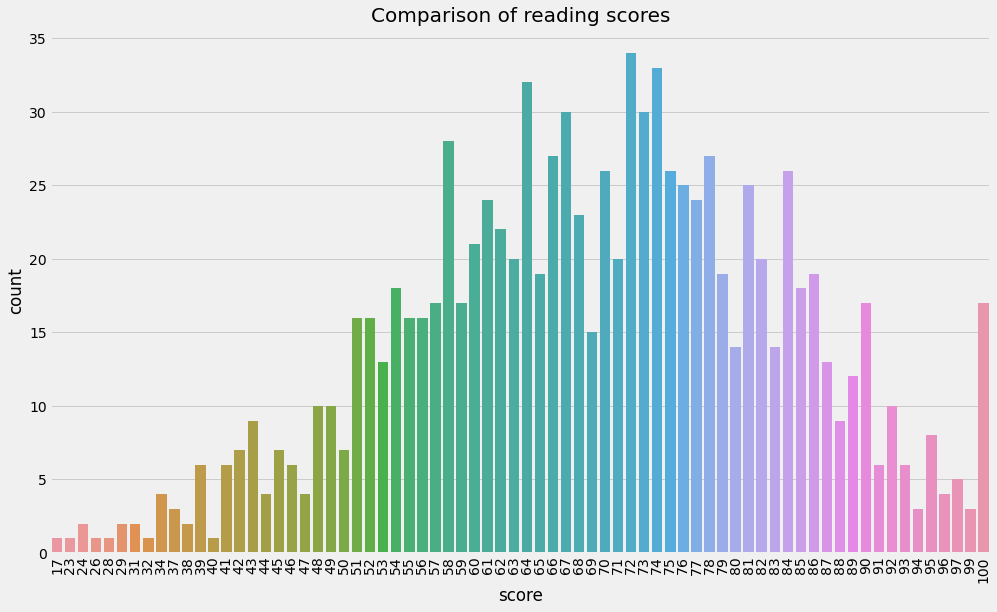

In [23]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

sns.countplot(df['reading score'])
plt.title('Comparison of reading scores', fontweight = 30, fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

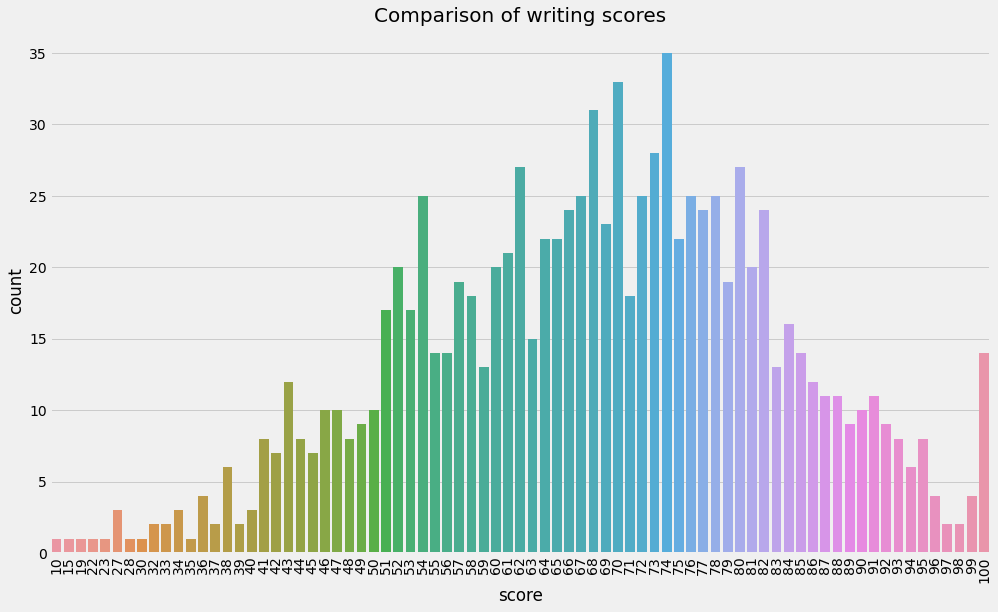

In [24]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

sns.countplot(df['writing score'])
plt.title('Comparison of writing scores', fontweight = 30, fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

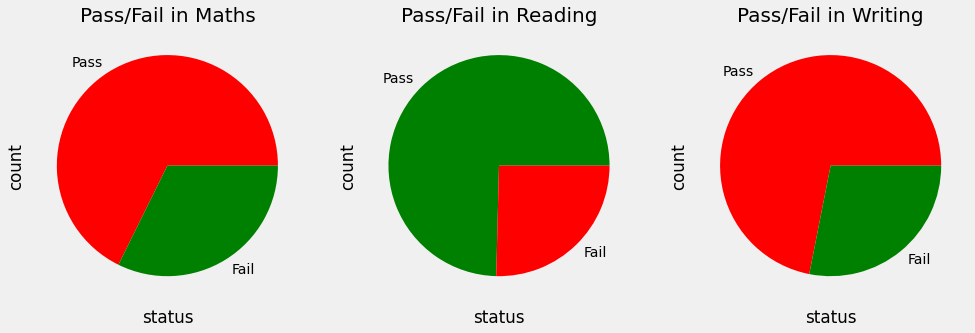

In [49]:
passmarks = 60

plt.subplot(1,3,1)
df['pass_math'] = np.where(df['math score']< passmarks, 'Fail', 'Pass')
df['pass_math'].value_counts().plot.pie(colors = ['red', 'green'])

plt.title('Pass/Fail in Maths', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')


plt.subplot(1,3,2)
df['pass_reading'] = np.where(df['reading score']< passmarks, 'Fail', 'Pass')
df['pass_reading'].value_counts().plot.pie(colors = ['green', 'red'])

plt.title('Pass/Fail in Reading', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')


plt.subplot(1,3,3)
df['pass_writing'] = np.where(df['writing score']< passmarks, 'Fail', 'Pass')
df['pass_writing'].value_counts().plot.pie(colors = ['red', 'green'])

plt.title('Pass/Fail in Writing', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

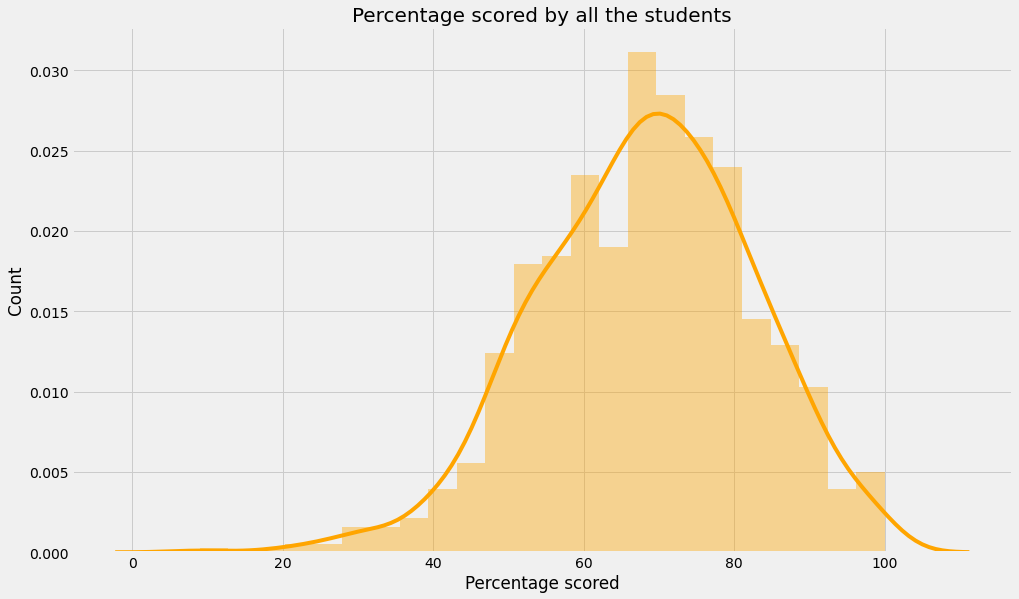

In [53]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['percentage'] = df['total_score']/3

import warnings
warnings.filterwarnings('ignore')

for i in range(0, 1000):
    df['percentage'][i] = ceil(df['percentage'][i])

plt.rcParams['figure.figsize'] = (15, 9)
sns.distplot(df['percentage'], color = 'orange')

plt.title('Percentage scored by all the students', fontweight = 30, fontsize = 20)
plt.xlabel('Percentage scored')
plt.ylabel('Count')
plt.show()

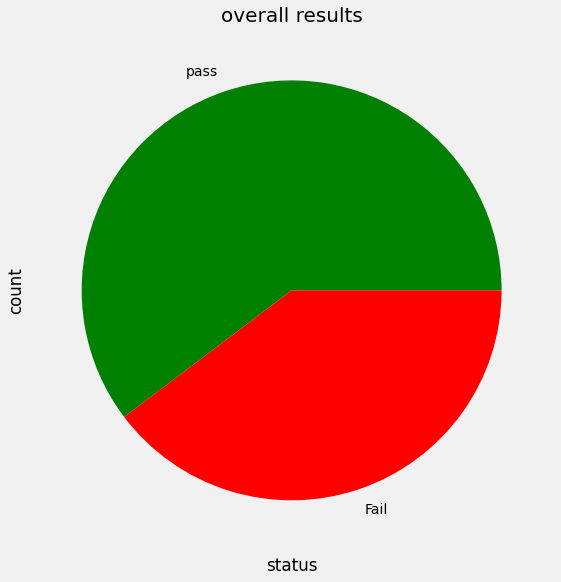

In [52]:
df['status'] = df.apply(lambda x : 'Fail' if x['pass_math'] == 'Fail' or 
                           x['pass_reading'] == 'Fail' or x['pass_writing'] == 'Fail'
                           else 'pass', axis = 1)

df['status'].value_counts(dropna = False).plot.pie(colors = ['green', 'red'])
plt.title('overall results', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()